#**CHAPTER 8 신경망 & 딥러닝의 응용(필기체 숫자 인식)**

##**8.1 MNIST 데이터베이스**

필기체 숫자 데이터셋에는 MNIST라는 유명한 데이터베이스를 사용합니다. MNIST는 THE MNIST DATABASE of handwritten 웹사이트에서 무료로 다운로드 할 수 있지만, 케라스 코드를 사용하면 더 쉽게 사용할 수 있습니다.

또한 MNIST에는 60000개의 훈련용 데이터(이미지와 라벨)과 10000개의 테스트용 데이터가 있습니다.

![mnist](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)



In [ ]:
#MNIST 데이터 로드
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


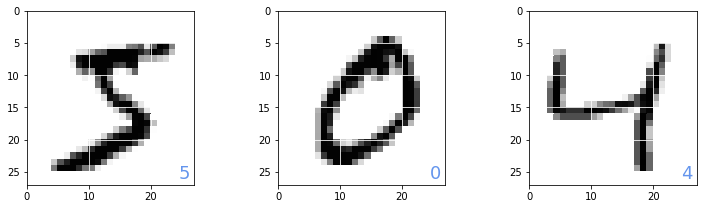

In [ ]:
#데이터 표시
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id],
             color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

##**8.2 2층 피드 포워드 네트워크 모델**

앞의 7장에서 했던 2층 피드 포워드 네트워크 모델을 사용해 이 필기체 숫자의 클래스 분류 문제가 해결되는지 살펴봅시다.

우선 데이터를 사용하기 쉬운 형태로 변경합니다.

이 네트워크는 28 x 28의 이미지 데이터를 784 길이의 벡터로 처리합니다. 60000 x 28 x 28의 배열을 60000 x 784의 배열로 변환합니다. 또한 입력은 실수로 처리하고 싶으므로 int를 float형으로 바꿔주고 255로 나누어 0 ~ 1의 실수로 변환합니다. 
y_train의 요소는 0~9의 정수이며 np_utils.to_categorical()이라는 케라스 함수를 사용하여 1-of-K 부호화법으로 변경합니다. x_test와 y_test도 동일하게 바꿔줍니다.

In [ ]:
#데이터 형태 변경
from keras.utils import np_utils


x_train = x_train.reshape(60000, 784) # (A)
x_train = x_train.astype('float32') # (B)
x_train = x_train / 255 # (C)
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes) # (D)


x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

입력은 784차원의 벡터입니다. 네트워크의 출력층은 10개의 숫자를 분류할 수 있도록 10개의 뉴런으로 하여, 각 뉴런의 출력값이 확률을 나타내도록 하기 위해 활성화 함수는 소프트맥스를 사용합니다. 입력과 출력을 연결하는 중간층은 16개로 하고, 활성화 함수는 시그모이드 함수로 합니다.

다음 코드에서 이 네트워크를 정의합니다.

In [ ]:
#네트워크 정의
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential() # (A)
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (B)
model.add(Dense(10, activation='softmax')) # (C)
model.compile(loss='categorical_crossentropy',
optimizer=Adam(), metrics=['accuracy']) # (D)

(A)에서 model을 sequential()로 정의하고,(B)에서 784 차원 입력을 갖는 16개의 중간층, (C)에서 10개의 출력층을 정의하고 있습니다.

(D)의 model.compile()의 인수에 Adam을 통해 알고리즘을 Adam으로 설정했습니다.

------------
####**Adam**


* Adam이란?

2개의 [lower-order moments]의 추정치를 기반으로 [stochastic object functions]를 [first-order gradient based]로 최적화 하는 알고리즘

gradient의 첫번째와 두번째 moments의 추정치로부터 다른 파라미터에 대한 개별적인 학습률을 계산

첫번째 moment의 추정치 : momentum optimizer

두번째 momnet의 추정치 : AdaGrad/RMSProp optimizer

즉 Adam은 AdaGrad와 RMSProp의 장점을 통합해서 디자인 됨

[lower-order moments] : 저차 모먼트

[first-order gradient] : 1차 함수 기울기

[stochastic object functions] : 쉽게 말하면 Loss function이라고 보면 됨. mini-batch 방식과 같이 랜덤하게 트레이닝 샘플을 선택함으로써 매번 loss function 값이 달라지는 함수

* AdaGrad?

가중치의 업데이트 횟수에 따라 학습률을 조절하는 옵션이 추가된 최적화 알고리즘

![ad](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcNUKMm%2FbtqYbI1IWTq%2FL9tFaWV4GgI0k7jLHvqpdk%2Fimg.png)

업데이트가 많이 되지 않는 가중치들은 학습률을 크게함

반대로 업데이트가 많이 된 가중치들에 대해서는 학습률을 작게함 

위 식을 보면 가중치가 많이 업데이트 될 수록 h값이 누적되고 이 역수 값이 학습률과 곱해져서 결과적으로 학습률이 작아짐

하지만 AdaGrad에도 단점이 존재: 과거의 기울기를 제곱하여 계속 더해가기 때문에 학습을 진행할수록 업데이트 강도가 약해짐 이러한 문제를 해결하기 위해 RMSProp 알고리즘이 등장하게 됨

* RMSProp?

AdaGrad와의 차이점: 과거의 모든 기울기를 균일하게 더하지 않고, 먼 과거의 기울기는 서서히 잊고, 새로운 기울기 정보를 크게 반영


* Adam의 장정

(1) 간단한 구현-> 효율적인 연산 -> 메모리 요구 사항이 거의 없음

(2) 파라미터마다 학습률을 달리 조정 가능

(3) 데이터 및 모델 파라미터가 많이 필요한 문제에 적합

(4) gradient에 noisy가 있거나, sparse한 문제에도 적합

(5)Adam의 하이퍼 파라미터는 직관적이며, tuning이 거의 필요 없음

----------------------------------





In [ ]:
#모델 학습
import time


startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test)) # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 25us/step - loss: 2.0663 - acc: 0.2861 - val_loss: 1.7901 - val_acc: 0.4952
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 1.6092 - acc: 0.6483 - val_loss: 1.4405 - val_acc: 0.7655
Epoch 3/10
60000/60000 [==============================] - 1s 23us/step - loss: 1.3224 - acc: 0.7872 - val_loss: 1.2012 - val_acc: 0.8196
Epoch 4/10
60000/60000 [==============================] - 1s 23us/step - loss: 1.1159 - acc: 0.8241 - val_loss: 1.0217 - val_acc: 0.8443
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.9570 - acc: 0.8433 - val_loss: 0.8818 - val_acc: 0.8580
Epoch 6/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.8330 - acc: 0.8583 - val_loss: 0.7737 - val_acc: 0.8707
Epoch 7/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.7375 - acc: 0.8690 - val_loss: 0.6899 - val_acc

코드를 실행하면 (A)에서 verbose=1로 설정하여 매 시기의 학습 평가치가 표시되며, 최종적으로 테스트 데이터의 상호 엔트로피 오차,정답률,계산시간이 표시됩니다.

(A)에서의 epochs는 학습 갱신 횟수를 칭하는 매개 변수입니다. 예를 들어 훈련 데이터 60,000개에 배치 사이즈를 1000으로 할 경우, 학습 데이터를 모두 사용하는 데 60회의 매개 변수 갱신이 진행됩니다. 이를 1 epochs라고 합니다. 

--------------------------------------

* 확률적 경사 하강법

지금까지는 전체 데이터셋에 대한 오차 함수의 기울기를 갱신 1단계마다 계산하고 있었습니다. 하지만 데이터가 크면 계산에 많은 시간이 걸립니다. 그런 경우에는 데이터 일부로 오차 함수의 기울기를 계산하는 '확률적 경사 하강법'(SGD)이 사용됩니다. 1회 갱신에 상요하는 데이터의 크기는 배치 크기로 정의합니다.

일부 데이터셋에서 계산된 기울기 방향은 전체 데이터셋에서 계산된 기울기 방향과는 약간 다릅니다. 즉, 전체 오차를 최소화 하는 방향으로 곧장 나아가는 것이 아니라, 노이즈의 영향을 받는 것처럼 휘청거리면서 서서히 오차가 낮은 방향으로 나아갑니다.

기존의 경사 하강법은 일단 국소해에 빠지면 그곳이 아무리 얕아도 빠져나갈 수 없습니다. 한편, 확률적 경사 하강법의 경우는 '휘정거리는 효과 덕분에 국소해를 벗어날 수 있는'유용한 성질이 있습니다.

----------------------------------------------

오버 피팅이 일어나지 않았는지 확인하기 위해, 테스트 데이터 오차의 시간 변화를 살펴봅시다.

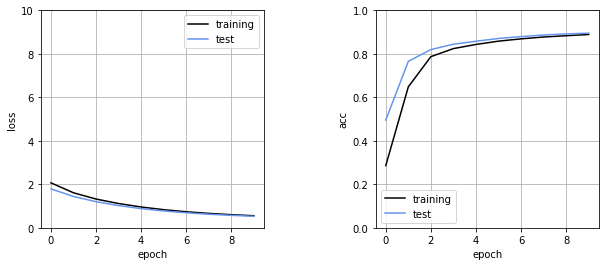

In [ ]:
#학습과정 그래프화 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='training', color='black')
plt.plot(history.history['val_acc'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

오버 피팅은 일어나지 않은것 같습니다. 우리가 학습시킨 모델이 잘 동작하는지 실제로 확인하기 위해서 실제 테스트 데이터를 입력했을 때 모델의 출력을 살펴봅시다.

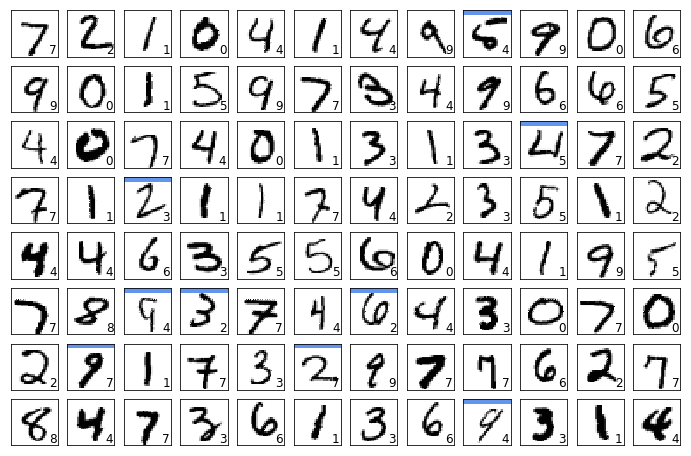

In [ ]:
#-- 리스트 8-1-(7)
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
#-- 메인
show_prediction()
plt.show()

(A)의 y = model.predict(x_text)에서 x_test 전체에 대한 모델의 출력 y를 얻을 수 있습니다. 그 중에서 처음 96개의 분량을 표시한 것입니다.

모델의 성능을 직접 보는 것은 중요합니다. 모델의 움직임을 실감할 수 있습니다. 대체적으로 잘 동작하는 것처럼 보이지만, 잘못된 데이터가 9개 있습니다. 그중에서는 정확히 3인데 2로 대답하거나 반대로 2로 보이는 것을 3으로 대답한 경우도 있습니다. 그다지 만족스럽지 못한 수준입니다.

##**8.3 ReLU 활성화 함수**

![relu](https://dhruvs.space/static/bc74d0e78475fe39fc14598c62c3b84c/37523/sig-vs-relu.png)

활성화 함수는 전통적으로 시그모이드 함수가 사용되었지만, 최근에넌 ReLU라는 활성화 함수가 인기입니다. 2015년에 얀,벤이조,힌튼이 '네이처'에 발표한 논문에서는 'ReLU가 활성화 함수로서 최선'이라고 합니다. 

시그모이드 함수는 입력 x가 어느 정도 커지면 항상 1에 가까운 값을 출력하기 때문에, 입력의 변화가 출력에 반영되기 어렵습니다. 그 결과, 오차 함수의 가중치 매개 변수에 대한 편미분이 0에 가까운 값이 되어, 경사 하강법의 학습이 늦어지는 문제점이 있었습니다.

그러나 ReLU를 사용하면 입력이 긍정적으면 학습의 정체 문제는 해결됩니다. 또한 프로그램에서는 max(0,x)로 쉽게 나타낼 수 있기 때문에 계산이 빠르다는 장점도 있습니다.

네트워크 중간층의 활성화 함수를 ReLU로 바꾸어 실행해봅시다. 중간층의 activationd을 sigmoid에서 relu로 바꿨을 뿐입니다.

In [ ]:
#활성화 함수 변경(sigmoid -> relu)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) # (A)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 21us/step - loss: 1.5461 - acc: 0.5425 - val_loss: 0.9006 - val_acc: 0.8073
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.6691 - acc: 0.8450 - val_loss: 0.4987 - val_acc: 0.8772
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.4513 - acc: 0.8828 - val_loss: 0.3898 - val_acc: 0.9001
Epoch 4/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.3751 - acc: 0.8988 - val_loss: 0.3395 - val_acc: 0.9106
Epoch 5/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.3351 - acc: 0.9076 - val_loss: 0.3103 - val_acc: 0.9169
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.3092 - acc: 0.9132 - val_loss: 0.2918 - val_acc: 0.9202
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2911 - acc: 0.9178 - val_loss: 0.2761 - val_acc

정확도가 약 3%정도 오른것을 볼 수 있습니다.

이후 show_prediction()을 실행하면 테스트 데이터 인식의 예를 볼 수 있습니다.

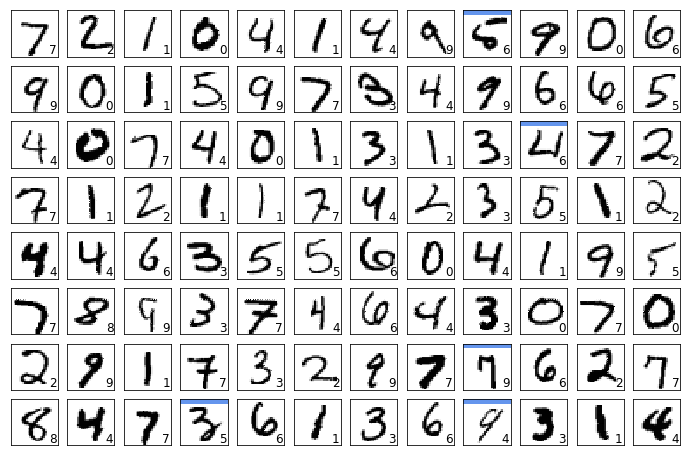

In [ ]:
# 테스트 데이터 결과
show_prediction()
plt.show()

결과를 자세히 살펴보면 처음 96개의 데이터 중에서 잘못 인식한 것이 5개로 줄었습니다. 수치상으로 단 3% 향상한 것이지만 실제 성능을 보면, 3%는 큰 개선임을 실감할 수 있습니다.

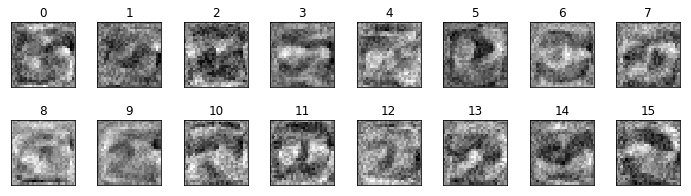

In [ ]:

# 1층째의 가중치 시각화
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

위의 그림은 학습된 모델의 가중치들을 시각화 한 것입니다.

가중치 값이 양수면 검은색으로, 음수면 흰색으로 표시합니다. 검은 부분에 문제 일부분이 있으면 그 뉴런은 활성화 하고, 흰 부분에 문자 일부분이 있으면 억제됩니다. 

예를 들어, 12번 뉴런의 가중치는 중심에 희미하게 2의 형태가 검게 나타나고 있습니다. 즉, 이 뉴런은 2의 이미지에서 활동이 증가하는 뉴런입니다. 아마 '2'를 인식하는데 도움될 것입니다. 다른 뉴런도 특정 숫자의 특징에 반응하는 것 같습니다.

이렇게 간단한 피드 포워드 네트워크 모델에서도 약 93%의 정확도를 낼 수 있었습니다. 사실 이 모델은 '입력은 2차원 이미지'라는 공간 정보를 전혀 사용하지 않고 있습니다.

28 x 28의 입력 이미지를 길이 784의 벡터로 전개하여 네트워크에 입력합니다. 화소의 정렬 순서는 네트워크 성능과 전혀 관계가 없습니다. 즉 화소가 마구 섞여도 성능은 변하지 않습니다.

그 이유는 네트워크 구조가 전결합형이며 모든 입력 성분은 대등한 관계이기 때문입니다. 이웃에 있는 입력 성분도, 멀리 떨어진 입력 성분도 수식상으로는 똑같은 관계입니다.그래서 공간 정보가 사용되고 있지 않습니다.

##**8.4 공간필터**

![필터](https://user-images.githubusercontent.com/15958325/58845860-ca23ed00-86b7-11e9-805f-ef5c8adcab9f.png)

공간 정보란 직선,곡선,원형이나 사각형 같은 모양을 나타내는 정보입니다. 이러한 형태를 골라 내는 방법으로 '공간 필터'라는 이미지 처리법이 있습니다.

필터는 2차원 행렬로 표현됩니다. 이미지의 일부분과 필터 요소를 곱한 합을, 이미지를 슬라이드 시키면서 이미지의 전 영역에서 구합니다. 이러한 계산을 '합성곱 연산'이라고 합니다.

원본 이미지의 위치 (i,j)의 픽셀 값을 x(i,j), 3 x 3의 필터를 h(i,j)로 하면, 합성곱 연산에서 얻어지는 값 g(i,j)는 다음과 같이 됩니다.

$$g(i,j) = \sum_{u=-1}^1\sum_{v=-1}^1x(i+u,j+v)h(u+1,v+1)$$

필터의 크기는 3 x 3 뿐 아니라 임의로 결정할 수 있지만, 5 x 5, 7 x 7 등 중심을 결정할 수 있는 홀수 너비가 사용하기 쉽습니다. 실제 필기체 숫자에 합성곱 연산을 해봅시다. 이미지 데이터를 1차원에서 2차원으로 바꾸기 위하여 일단 메모리를 초기화하고 다시 MNIST 데이터를 읽는데, 이번에는 (data index) x 28 x 28인 채로 사용합니다.

In [ ]:
#메모리 초기화
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
#데이터 불러오기
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

이번에는 가로 및 세로 엣지를 강조하는 2개의 필터를 훈련 데이터의 2번째인 '4'에 적용해 봅시다. 

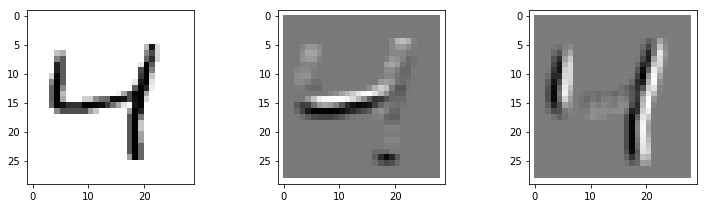

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline


id_img = 2
myfil1 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float) # (A)
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float) # (B)


x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil2.reshape(-1)) 


# - 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

위의 이미지 결과가 나왔습니다. 지금의 예시에는 가로와 세로 엣지를 강조하는 필터를 사용했지만, 필터의 수치를 바꾸는 것으로 대각선 엣지 강조, 이미지 스무딩, 세부 부분의 강조 등 다양한 처리를 할 수 있습니다.

위에서 사용된 가로 필터는 모든 요소를 합하면 0이 되도록 디자인되어 있습니다. 이렇게 하면 공간 구조가 없는 균일한 부분은 0으로 변환되고, 필터에서 추출하려는 구조가 존재할 경우에는 0이상의 값으로 변환되어, 0을 감지 레벨의 기준으로 세울 수 있어 편리합니다. 

필터를 적용하면 출력 이미지의 크기는 작아집니다. 이 때문에 불편함도 생깁니다. 연속으로 다양한 필터를 적용하면 이미지가 점점 작아져 버립니다. 이 대응책으로 패딩이라는 방법이 있습니다.

* 패딩 

![패딩](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure_3.png)

패딩은 필터를 적용하기 전에 0등의 고정된 요소로 주위를 부풀려두는 방법입니다. 3 x 3의 필터를 적용할 경우에는 폭 1의 패딩을 하면 이미지 크기는 변하지 않습니다. 5 x 5의 경우에는 폭이 2인 패딩을 하면 좋을 것입니다.

* 스트라이드

패딩뿐 아니라, 필터 처리와 관련된 매개 변수가 하나 더 있습니다. 지금까지의 필터는 한 칸씩 이동했지만, 2카닝나 3칸 등 어떤 간격이든 이동할 수 있습니다. 이 간격을 스트라이드라고 합니다. 스트라이드를 크게 하면 출력 이미지가 작아집니다. 패딩과 스트라이드 값은 라이브러리로 합성곱 네트워크를 사용할 때 인수로 전달하게 됩니다.

##**8.5 합성곱 신경망**

필터를 신경망에 적용할 준비가 되었습니다. 필터를 사용한 신경망을 합성곱 신경망이라고 합니다.

필터에 적용하는 수치에 따라 다양한 이미지 처리가 가능하지만 CNN은 그 필터 자체를 학습시킵니다. 먼저 필터 8장을 사용한 간단한 CNN을 만들어 봅시다. 

입력 이미지에 대해 크기 3 x 3, 패딩 1, 스트라이드 1의 필터를 8장 적용합니다. 1장의 필터의 출력은 28 x 28이므로 총 28 x 28 x 8의 3차원 배열이 됩니다. 이를 1차원으로 길이가 6272인 배열로 전개하고, 전결합으로 10개의 출력층 뉴런에 결합합니다.





In [ ]:
#CNN 구현
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same',
                 input_shape=(28, 28, 1), activation='relu')) # (A)
model.add(Flatten()) # (B)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.7696 - acc: 0.8154 - val_loss: 0.3387 - val_acc: 0.9044
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.3161 - acc: 0.9093 - val_loss: 0.2741 - val_acc: 0.9215
Epoch 3/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.2648 - acc: 0.9255 - val_loss: 0.2409 - val_acc: 0.9341
Epoch 4/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.2300 - acc: 0.9354 - val_loss: 0.2120 - val_acc: 0.9424
Epoch 5/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.2019 - acc: 0.9440 - val_loss: 0.1899 - val_acc: 0.9487
Epoch 6/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.1807 - acc: 0.9501 - val_loss: 0.1710 - val_acc: 0.9541
Epoch 7/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.1620 - acc: 0.9556 - val_loss: 0.1579 - 

In [ ]:
model.add(Conv2D(8, (3, 3), padding='same',
                 input_shape=(28, 28, 1), activation='relu'))

첫 번째 인수 (8, (3,3))은 3 x 3의 필터를 8개 사용한다는 뜻입니다. 

padding='same'은 출력 크기가 변하지 않도록 패딩을 추가해 처리한다는 의미입니다. 

input_shpa=(28,28,1)은 입력 이미지의 크기입니다. 지금은 흑백 이미지를 다루고 있기 떄문에 마지막 인수를 1로 하고 있습니다. 만약 컬러 이미지 입력이라면 3으로 지정합니다. 

활성화 함수는 ReLU를 사용합니다. 기본적으로 바이어스 입력도 지정되어 있습니다. 바이어스는 각 필터에 1변수씩 할당됩니다. 또한 필터의 학습전의 초기값은 임의로 설정되며 바이어스의 초기값은 0으로 설정됩니다.

합성곱층의 출력은 4차원으로 그 크기는 (배치 수,필터 수,출력 이미지의 세로폭, 출력 이미지의 가로폭)으로 되어 있습니다. 이것을 다음 출력층(Dense 층)에 넣으려면 (배치수,필터수x출력 이미지의 세로폭x출력 이미지의 가로폭)의 2차원으로 해야 합니다. 이러한 변환은 model.add(Flatten())에서 실시하고 있습니다.

실행 결과를 살펴보도록 하겠습니다.

In [ ]:
#테스트 결과 이미지 출력
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

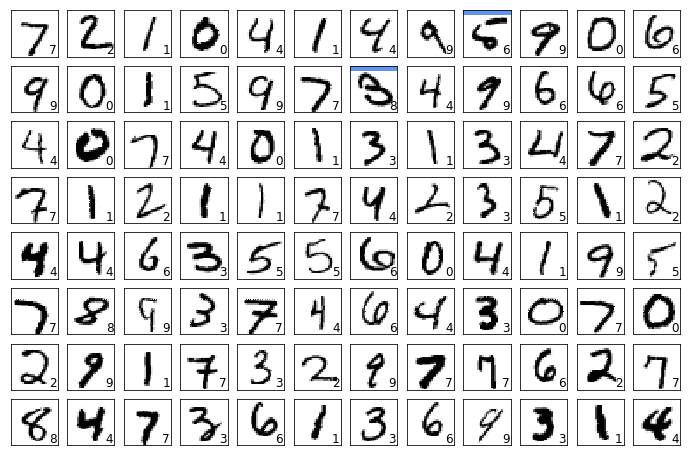

In [ ]:
# 함수 호출
show_prediction()
plt.show()

96개 중 잘못 인식한 것은 단 2개입니다. 이전보다 훨씬 좋은 성능을 보입니다.

학습에서 획득한 8장의 필터와 각 필터를 적용시킨 출력물을 보도록 하겠습니다.

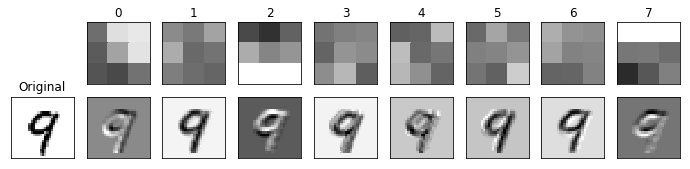

In [ ]:

plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")


w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

결과를 살펴보면 2번 필터는 가로줄의 아래쪽 엣지를 강조하고, 7번 필터는 가로줄의 위쪽 엣지를 강조하는 기능이 있는 것 같습니다. 이러한 필터가 자동으로 학습되고 있습니다.

##**8.6 풀링**

![풀링](http://cs231n.github.io/assets/cnn/maxpool.jpeg)

합성곱층은 2차원 이미지가 가지는 특징을 이용할 수 있지었지만, 이미지 인식과 관련해 중요한 것이 하나 더 있습니다. 이미지의 위치의 어긋남에 대한 견고성 입니다.

예를 들어, 필기체 숫자 '2'가 1픽셀만 어긋난 이미지를 입력해도 각 배열의 수치는 완전히 달라집니다. 인간의 눈으로 봐서는 거의 동일한 입력이지만 네트워크에서는 완전히 다른 패턴으로 인식되어 버립니다.

이것은 CNN을 사용해도 마찬가지입니다. 이 문제를 해결하는 방법으로 '풀링 처리'가 있습니다.

위 그림은 최대 풀링의 예를 나타낸 것입니다. 입력 이미지 내의 2 x 2의 작은 영역에 착안하여 가장 큰 값을 출력값으로 합니다. 작은 공간은 스트라이드 2로 이동해 동일한 처리를 반복하고 있습니다. 그 결과 출력 이미지의 가로 세로 크기는 입력 이미지의 절반이 됩니다.

이렇게 하여 얻은 출력 이미지는, 입력 이미지가 가로 세로로 어긋나도 거의 변하지 않는 성질을 갖습니다. 이 풀링층을 네트워크에 도입하여 위치만 어긋난 이미지에 비슷한 출력을 반환하는 성질을 덧붙일 수 있습니다. 

최대 풀링 외에 평균 풀링이 있습니다. 이 경우, 작은 영역의 수치의 평균을 출력값으로 합니다. 

작은 영역은 2 x 2뿐만 아니라 3 x 3 또는 4 x 4로 임의로 크기를 결정할 수 있습니다.  그에 대한 스트라이드 또한 임의로 결정할 수 있습니다.

##**8.7 드롭아웃**

![드롭아웃](https://t1.daumcdn.net/cfile/tistory/99324B335D383CBD1B)

네트워크의 학습을 개선하는 방법으로 드롭아웃이라는 방법이 니티시 스리바스타바, 제프리 힌튼 등의 논문에서 제안되었습니다. 이 방법은 다양한 응용 분야에서 좋은 결과를 얻고 있습니다.

드롭아웃은 학습 시에 입력층의 유닛과 중간층 뉴런을 확률 p(p<1)로 임의로 선택하여, 나머지를 무효화하는 방법입니다. 무효화된 뉴런은 존재하지 않는 것으로 하여 학습을 갱신합니다. 미니 배치마다 뉴런을 뽑아 이 절차를 반복합니다.

학습 후 예측하는 경우에는 모든 뉴런이 사용됩니다. 학습 시에는 p의 비율의 뉴런밖에 존재하지 않는 상태에서 학습하고 있었는데, 예측 시에 전체 참가가 되면 출력이 커져 버립니다.(1/p)배, 그래서 예측 시에는 드롭아웃을 한 층의 출력 대상의 가중치를 p배로 하여 작게 설정하여 계산을 맞춥니다.

드롭아웃은 여러 네트워크를 각각 학습시켜 예측 시에 네트워크를 평균화해 합치는 효과가 있습니다. 

* 드롭아웃을 왜 사용할까?

드롭아웃은 어떤 특정한 설명변수 Feature만을 과도하게 집중하여 학습함으로써 발생할 수 있는 오버피팅을 방지하기 위해 사용됩니다.

##**8.8 MNIST 인식 네트워크 모델**

합성곱 네트워크에 풀링과 드롭아웃을 도입하여 계층의 수를 늘리고, 모두를 갖추고 있는 네트워크를 마지막으로 구축해봅시다.

먼저 1층,2층에서 합성곱층을 연속시킵니다. 1층의 합성곱층은 16장의 필터를 사용하고 있기 떄문에, 출력은 28 x 28의 이미지가 16장이 됩니다. 

다음 층의 합성곱은 이 3차원 배열의 데이터에 대해 수행됩니다. 3 x 3의 1장의 필터는 실질적으로 3x3x16의 배열로 정의됩니다. 이 3 x 3 x 16의 크기를 가지는 필터가 32개 있는 두 번째 레이어의 합성곱층입니다. 필터를 정의하는 매개 변수의 수는 바이어스 항을 제외하면 3 x 3 x 16 x 32가 됩니다.

3층에는 2 x 2 맥스 풀링층으로 이미지의 가로 세로의 크기는 절반인 14 x 14가 되고, 4층에서 한 번 더 합성곱층을 합니다. 여기서 필터의 수는 64장입니다. 5층에서는 다시금 맥스 풀링에 의해 이미지 크기가 7x7이 되어, 다음 6층에서는 128개의 절결합, 마지막 7층에서는 출력이 10개인 전결합층이 됩니다. 또한 5층과 6층에서는 드롭아웃도 넣고 있습니다.



In [ ]:
#MNIST 인식 네트워크 모델
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(16, (3, 3),
                 input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (A)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (B)
model.add(Dropout(0.25)) # (C)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) # (D)
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


startTime = time.time()


history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 57s 958us/step - loss: 0.6237 - acc: 0.8080 - val_loss: 0.1167 - val_acc: 0.9645
Epoch 2/20
60000/60000 [==============================] - 56s 931us/step - loss: 0.1296 - acc: 0.9614 - val_loss: 0.0622 - val_acc: 0.9799
Epoch 3/20
60000/60000 [==============================] - 56s 930us/step - loss: 0.0860 - acc: 0.9740 - val_loss: 0.0465 - val_acc: 0.9860
Epoch 4/20
60000/60000 [==============================] - 56s 926us/step - loss: 0.0676 - acc: 0.9790 - val_loss: 0.0377 - val_acc: 0.9884
Epoch 5/20
60000/60000 [==============================] - 56s 926us/step - loss: 0.0557 - acc: 0.9829 - val_loss: 0.0319 - val_acc: 0.9890
Epoch 6/20
60000/60000 [==============================] - 56s 928us/step - loss: 0.0499 - acc: 0.9843 - val_loss: 0.0290 - val_acc: 0.9907
Epoch 7/20
60000/60000 [==============================] - 56s 929us/step - loss: 0.0452 - acc: 0.9856 - val_loss: 0.

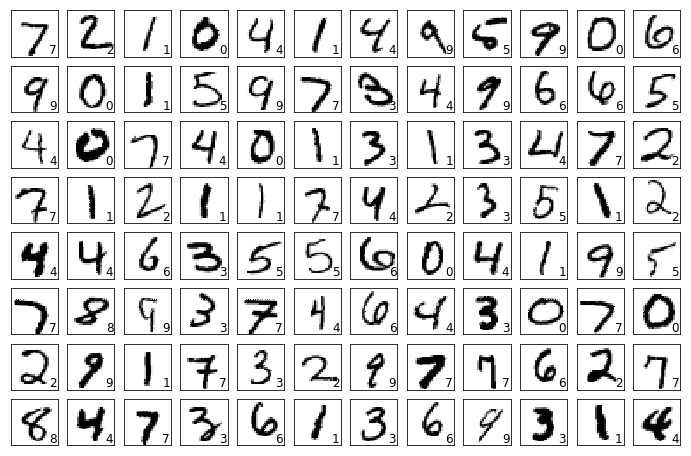

In [ ]:
# 리스트 8-2-(7)
show_prediction()
plt.show()

테스트 데이터의 처음 96개는 잘못된 인식 없이 모두 정답이 되었습니다. 계속 정답이 되지 않았던 오른쪽 위에서 4번째의 찌그러진 '5'도 드디어 정답이 되었습니다.

여기에서는 '모든 기술을 시험한다'는 점에 중점을 두어 네트워크를 디자인 했기 때문에, 앞으로 더 단순하고 정확한 네트워크를 만드는 것도 가능할 것입니다. 

MNIST 데이터보다 더 큰 크기의 자연의 이미지를 처리하거나 많은 카테고리를 다루는 경에우는 층의 심층화, 합성곱, 풀링, 드롭아웃의 효과가 더욱 강력하게 발휘될 것입니다.

--------------------------
##AFETER

* 풀링에 관하여

풀링은 입력이 작게 이동해도 근사적으로 불변이 되게 하는데 도움을 준다. 따라서 어떤 특징의 구체적인 위치가 아닌 그런 특증의 존재 여부 자체가 더 중요할 때는 이러한 국소 이동에 대한 불변성이 유용하다.

풀링을 하는 중요하는 이유는 바로 입력 데이터의 차원 감소이다. 국소부위에서 대표되는 픽셀로 대체하면, 데이터의 차원이 감소하게 된다. 때문에 신경망의 계산 효율성이 좋아진다.이는 메모리 요구량의 감소로 이어진다.

VGG까지는 맥스 풀링을 많이 사용했으나, 요즘 경향은 풀링을 사용하기 보다는 컨볼루션 필터의 스트라이드를 늘리는 것으로 차원축소를 한다.

그 이유는 맥스풀링으로 일정 영역의 강한 피처들만을 다음 레이어로 넘기면, 처음에는 적은 계산량으로 좋은 성능을 유지할 수 있을지 몰라도, 매우 깊어진 신경망으로 가면 갈수록, 점점더 미세한 피처가 중요해지는데, 해당 정보가 날아가기 때문이다.

따라서 컨볼루션 연산시 스트라이드를 늘리는 방식으로 차원을 축소하여 피처를 버리는 것이 아니라, 피처에 대해서 컨볼루션 연산을 수행해서 해당 피처를 고려할 수 있기 때문에 깊은 신경망으로 가면 갈수록 이점이 존재한다.



-----------------------------

###**참고 사이트**

* Adam 

https://ropiens.tistory.com/90

* ReLU 이미지

https://dhruvs.space/posts/ml-basics-issue-4/

* 합성곱 필터 이미지

https://gruuuuu.github.io/machine-learning/cnn-doc/

* 패딩, 풀링 이미지

https://yceffort.kr/2019/01/29/pytorch-3-convolutional-neural-network

* 드롭아웃 이미지

https://jjeongil.tistory.com/578


